<a href="https://colab.research.google.com/github/kellyz04/Text-Analytics/blob/master/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install pyLDAvis
!pip install lda
import re # We clean text using regex
import csv # To read the csv
from collections import defaultdict # For accumlating values
from nltk.corpus import stopwords # To remove stopwords
from gensim import corpora # To create corpus and dictionary for the LDA model
from gensim.models import LdaModel # To use the LDA model
import pyLDAvis.gensim # To visualise LDA model effectively
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.tokenize import PunktSentenceTokenizer, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')
import nltk
import lda
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')


     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 55.1MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=323c78e200bec5930fcad8915caf9c66be70fdbfd124af6cb3a867052684b620
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32040 sha256=ec6e68fc85d0a11d5e0409f1f5b7764e89df778647236a778c1f8b3bb18f6218
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy
     |████████████████████████████████| 358kB 2.8MB/s 
     |████████████████████████████████| 102kB 12.9MB/s 


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
Four_Seasons = pd.read_csv('/content/drive/My Drive/Downtown Hotels/Four_Seasons_reviews.csv')
Hilton = pd.read_csv('/content/drive/My Drive/Downtown Hotels/Hilton_reviews.csv')
Hotel_ZaZa = pd.read_csv('/content/drive/My Drive/Downtown Hotels/Hotel_ZaZa_Austin_reviews.csv')
InterContinental = pd.read_csv('/content/drive/My Drive/Downtown Hotels/InterContinental_reviews.csv')
JW_Marriott = pd.read_csv('/content/drive/My Drive/Downtown Hotels/JW_Marriott_reviews.csv')
Kimpton_Hotel_Van_Zandt = pd.read_csv('/content/drive/My Drive/Downtown Hotels/Kimpton_Hotel_Van_Zandt_reviews.csv')
Omni = pd.read_csv('/content/drive/My Drive/Downtown Hotels/Omni_Austin_Hotel_Downtown-Austin_reviews.csv')
The_Driskill = pd.read_csv('/content/drive/My Drive/Downtown Hotels/The_Driskill_reviews.csv')
Westin = pd.read_csv('/content/drive/My Drive/Downtown Hotels/The_Westin_Austin_Downtown_reviews.csv')
W_Austin = pd.read_csv('/content/drive/My Drive/Downtown Hotels/W_Austin_reviews.csv')

In [0]:
Four_Seasons['hotel'] = 'seasons'
Hilton['hotel'] = 'hilton'
Hotel_ZaZa['hotel'] = 'zaza'
InterContinental['hotel'] = 'continental'
JW_Marriott['hotel'] = 'marriott'
Kimpton_Hotel_Van_Zandt['hotel'] = 'kimpton'
Omni['hotel'] = 'omni'
The_Driskill['hotel'] = 'driskill' 
Westin['hotel'] = 'westin'
W_Austin['hotel'] = 'w'


In [0]:
downtown_reviews = pd.concat([Four_Seasons,
Hilton,
Hotel_ZaZa,
InterContinental,
JW_Marriott,
Kimpton_Hotel_Van_Zandt,
Omni,
The_Driskill,
Westin,
W_Austin])

In [0]:
downtown_reviews.head()

,rating,title,review,hotel
0,5,"Excellent, but pricey","The service, the rooms, and the common spaces ...",seasons
1,5,Four Seasons - Austin,Great place to stay in Austin. Great facility ...,seasons
2,5,Four Seasons Halloween Wedding Stay,I cannot say enough about how wonderful the st...,seasons
3,5,Awesome customer service!,The team at this hotel is awesome. Even when y...,seasons
4,5,"Beautiful, classy & comfortable.",Our 9:30 PM flight from NY to Austin was delay...,seasons


In [0]:
df= downtown_reviews.copy().reset_index()

In [0]:
sia = SentimentIntensityAnalyzer()

In [0]:
def remove(word,df):
  for i in range(len(df)):
    df[i] = df[i].lower()
    if word in df[i]:
      df[i] = df[i].replace(word, '')
    else:
      pass
  return df
def filter_word(comment):
    stop_words = set(stopwords.words('english'))
    word = re.findall(r'\w+',comment)
    filtered_sentence = ''
    for w in word: 
        if w.lower() not in stop_words: 
            filtered_sentence +=' '
            filtered_sentence += w    
    return filtered_sentence

In [0]:
remove('hotel',df['review'])
remove('austin',df['review'])
for i in range(len(df['review'])):
  df['review'][i] = filter_word(df['review'][i])

In [0]:
df['neg'] = df['review'].apply(lambda x:sia.polarity_scores(x)['neg'])
df['neu'] = df['review'].apply(lambda x:sia.polarity_scores(x)['neu'])
df['pos'] = df['review'].apply(lambda x:sia.polarity_scores(x)['pos'])
df['compound'] = df['review'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [0]:
df.head()
sent = df.groupby(["hotel"]).mean()

In [0]:
sent.to_csv("sent.csv", sep = ",")

In [0]:
pos_rev = df[df['compound']>0.2]['review']
neg_rev = df[df['compound']< -0.1]['review']

In [0]:
def word_count(comment): 
    word_dict = {}
    word = re.findall(r'\w+',comment)
    for j in word:
        if j not in word_dict:
            word_dict[j] = 1
    return word_dict

In [0]:
outer_dict = {}
for i in df['review']:
    inner_dict = {}
    i = i.lower() 
    filter_comment = filter_word(i)
    inner_dict = word_count(filter_comment)
    for key, value in inner_dict.items():
        if key not in outer_dict:
            outer_dict[key] = 1
        else:
            outer_dict[key] += 1

In [0]:
word_freq = pd.DataFrame(data = outer_dict,index=['freq'])
word_freq.T.sort_values(by='freq',ascending=False)
word_freq.T.to_csv("word_freq.csv", sep=",")

In [0]:
attributes = ['room','staff','service','location','street','food','restaurant','desk']

In [0]:
def single_word_count(word, comment_list):
    count = 0
    for comment in comment_list:
        comment = comment.lower()
        comment_list = re.findall(r'\w+',comment)
        if word in comment_list:
            count += 1
    return count

def pair_word_count(word1,word2, comment_list):
    count = 0
    for comment in comment_list:
        comment = comment.lower()
        comment_list = re.findall(r'\w+',comment)
        if word1 in comment_list and word2 in comment_list:
            count += 1
    return count

def lift(A, B, N, comment_list):
    return N * float(pair_word_count(A,B,comment_list)) /(single_word_count(A,comment_list)*single_word_count(B,comment_list))

In [0]:
brand = ['seasons','hilton','zaza','continental','marriott','kimpton','omni','driskill','westin','w']
att_lift=np.zeros((10,8))
for x in range(len(brand)):
    for y in range(len(attributes)):
            att_lift[x][y] = (lift(brand[x],attributes[y],len(df['review']),df['review']))

In [0]:
lift_att = pd.DataFrame(att_lift)
lift_att.columns = attributes
lift_att.index = brand
lift_att
lift_att.to_csv("lift_att.csv", sep = ",")

In [0]:
def attr_sentiment(attributes, df_hotel):
    shorten_df = []
    for i in attributes:
      for j in df_hotel:
        j = j.split() 
        if i in j:
          index = j.index(i)
          shorten_df.append([i, " ".join(j[index-4:index + 4])])
      
    shorten_df = pd.DataFrame(shorten_df)
    shorten_df.columns = ['attribute','attribute_review']
    shorten_df = shorten_df[shorten_df['attribute_review'] != ""]
    shorten_df['neg'] = shorten_df['attribute_review'].apply(lambda x:sia.polarity_scores(x)['neg'])
    shorten_df['neu'] = shorten_df['attribute_review'].apply(lambda x:sia.polarity_scores(x)['neu'])
    shorten_df['pos'] = shorten_df['attribute_review'].apply(lambda x:sia.polarity_scores(x)['pos'])
    shorten_df['compound'] = shorten_df['attribute_review'].apply(lambda x:sia.polarity_scores(x)['compound'])
    shorten_df = shorten_df.groupby("attribute")[['compound','neg','pos']].agg(['mean'])
    return shorten_df

In [0]:
for i in brand:
  df_fseason = df[df['hotel'] == i]['review']
  att_fseason = lift_att.loc[i][lift_att.loc[i] > 1].index.values
  print(i)
  shorten_df = attr_sentiment(att_fseason, df_fseason)
  shorten_df = pd.DataFrame(shorten_df)
  shorten_df = shorten_df.reset_index()
  print(shorten_df)
  print(" ")

seasons
    attribute  compound       neg       pos
                   mean      mean      mean
0        food  0.591096  0.024041  0.438186
1  restaurant  0.418256  0.029100  0.335800
2     service  0.477838  0.023712  0.360006
3       staff  0.587969  0.023953  0.444283
 
hilton
  attribute  compound       neg       pos
                 mean      mean      mean
0      desk  0.362613  0.034319  0.292710
1  location  0.613673  0.019793  0.456991
2      room  0.410579  0.032345  0.329852
3    street  0.200787  0.062650  0.187680
 
zaza
  attribute  compound      neg       pos
                 mean     mean      mean
0      desk  0.613660  0.00000  0.443400
1      food  0.594475  0.00000  0.447750
2   service  0.594675  0.02925  0.433417
 
continental
    attribute  compound       neg       pos
                   mean      mean      mean
0        desk  0.316191  0.038700  0.261988
1    location  0.607310  0.028098  0.463361
2  restaurant  0.527836  0.007188  0.384217
3       staff  0.6140

In [0]:
df['review_hotel'] = df['hotel'] + " "+ df['review']
df_review = list(df['review_hotel'])
brand_line = " ".join(brand)
df_review.append(brand_line)

'seasons hilton zaza continental marriott kimpton omni driskill westin w'

In [0]:
brand = ['seasons','hilton','zaza','continental','marriott','kimpton','omni','driskill','westin','w']
brand_lift=np.zeros((10,10))
for x in range(len(brand)):
    for y in range(len(brand)):
        if x == y:
            brand_lift[x][y] = 1
        else:
            brand_lift[x][y] = (lift(brand[x],brand[y],len(df_review),df_review))

In [0]:
w_token=RegexpTokenizer(r'\w+')
w_lemma = WordNetLemmatizer()
stop =set(stopwords.words('english'))

def tokenize(version_desc):
    text = w_lemma.lemmatize(version_desc.lower())
    tokens = w_token.tokenize(text)
    return tokens

df_copy = df.copy()
#remove('room',df_copy['review'])
#remove('rooms',df_copy['review'])
remove('great',df_copy['review'])
remove('good',df_copy['review'])
remove('nice',df_copy['review'])
vec = CountVectorizer(tokenizer=tokenize, stop_words=stop, decode_error='ignore')
words = vec.fit_transform(df_copy['review'])

model = lda.LDA(n_topics = 4, n_iter = 500, random_state = 1)
model.fit(words)

INFO:lda:n_documents: 4520
INFO:lda:vocab_size: 11882
INFO:lda:n_words: 198518
INFO:lda:n_topics: 4
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -1873145
INFO:lda:<10> log likelihood: -1684780
INFO:lda:<20> log likelihood: -1649145
INFO:lda:<30> log likelihood: -1626288
INFO:lda:<40> log likelihood: -1613286
INFO:lda:<50> log likelihood: -1606279
INFO:lda:<60> log likelihood: -1601707
INFO:lda:<70> log likelihood: -1599084
INFO:lda:<80> log likelihood: -1596669
INFO:lda:<90> log likelihood: -1594912
INFO:lda:<100> log likelihood: -1594145
INFO:lda:<110> log likelihood: -1593527
INFO:lda:<120> log likelihood: -1592161
INFO:lda:<130> log likelihood: -1591144
INFO:lda:<140> log likelihood: -1590443
INFO:lda:<150> log likelihood: -1590201
INFO:lda:<160> log likelihood: -1589427
INFO:lda:<170> log likelihood: -1590589
INFO:lda:<180> log likelihood: -1590156
INFO:lda:<190> log likelihood: -1589303
INFO:lda:<200> log likelihood: -1589529
INFO:lda:<210> log likelihood: -1588946
INFO:lda:<

In [0]:
topic_word = model.topic_word_
df_topic = pd.DataFrame(model.doc_topic_)
df_new = df_copy.join(df_topic)

In [0]:
df_pos = pd.DataFrame()
for i in range(4):
    topic = str(i)
    df_pos[topic]=df_new.groupby(["review"])[i].mean()

df_pos = df_pos.reset_index()
topics = pd.DataFrame(topic_word)
topics.columns = vec.get_feature_names()
topics = topics.T

In [0]:
topics.sort_values(0, ascending=False).head(10) #entertainment

,0,1,2,3
room,0.023022,2.991979e-02,6.878655e-03,0.013611
pool,0.013233,1.821035e-07,2.566480e-03,0.007909
bar,0.010461,1.821035e-07,3.155460e-03,0.009789
rooms,0.008171,3.551201e-03,3.891685e-03,0.014081
lobby,0.007772,3.097581e-04,7.154003e-04,0.004701
bathroom,0.006449,5.647030e-04,2.103500e-07,0.000552
really,0.006386,1.784797e-03,3.849615e-03,0.002698
small,0.006260,1.129224e-03,2.103500e-07,0.001083
like,0.006176,4.206773e-03,3.281670e-03,0.001349
place,0.006008,1.821035e-07,3.050285e-03,0.005191


In [0]:
topics.sort_values(1, ascending=False).head(10)  #room

,0,1,2,3
room,2.302164e-02,0.029920,6.878655e-03,0.013611
would,2.793869e-03,0.011054,3.492020e-03,0.007787
night,5.377478e-03,0.008650,2.524410e-03,0.002759
stay,2.478794e-03,0.007721,1.842687e-02,0.016452
one,5.230443e-03,0.007667,6.478990e-03,0.002289
check,2.100495e-07,0.007466,4.564805e-03,0.002943
get,4.642305e-03,0.007394,8.836802e-04,0.001390
desk,2.100495e-07,0.007339,6.394850e-03,0.001145
day,1.407542e-03,0.006629,2.419235e-03,0.000777
parking,2.100495e-07,0.006173,2.103500e-07,0.002923


In [0]:
topics.sort_values(2, ascending=False).head(10) #staff and service

,0,1,2,3
staff,1.638596e-03,2.895628e-03,0.024527,2.252134e-02
stay,2.478794e-03,7.721371e-03,0.018427,1.645167e-02
service,3.150953e-03,4.734874e-03,0.016954,1.166950e-02
us,7.983982e-04,5.863915e-03,0.012390,2.043660e-07
time,1.197492e-03,5.135501e-03,0.009171,4.373637e-03
made,2.100495e-07,1.548062e-03,0.008183,7.767951e-04
experience,2.100495e-07,2.185424e-03,0.008078,2.186920e-03
amazing,2.100495e-07,1.821035e-07,0.007804,2.902201e-03
four,2.100495e-07,5.647030e-04,0.006963,1.349020e-03
friendly,3.466027e-03,1.821035e-07,0.006879,1.027981e-02


In [0]:
topics.sort_values(3, ascending=False).head(10) #location

,0,1,2,3
staff,1.638596e-03,2.895628e-03,0.024527,0.022521
location,5.860592e-03,1.821035e-07,0.004586,0.021193
stay,2.478794e-03,7.721371e-03,0.018427,0.016452
downtown,1.680606e-03,1.821035e-07,0.002293,0.014285
rooms,8.171137e-03,3.551201e-03,0.003892,0.014081
room,2.302164e-02,2.991979e-02,0.006879,0.013611
clean,2.499799e-03,1.639114e-03,0.002293,0.012344
restaurants,2.100495e-07,1.821035e-07,0.000589,0.012119
service,3.150953e-03,4.734874e-03,0.016954,0.011670
friendly,3.466027e-03,1.821035e-07,0.006879,0.010280


In [0]:
df_pos = df_pos.set_index('review')
df_pos.columns = ['entertainment','room','staff and service','location']

In [0]:
df_pos['labels'] = df_pos.T.idxmax()


In [0]:
df_pos_entertainment = df_pos[df_pos['labels'] == "entertainment"]
df_pos_location = df_pos[df_pos['labels'] == "location"]
df_pos_staff_service = df_pos[df_pos['labels'] == "staff and service"]
df_room = df_pos[df_pos['labels'] == "room"]
df_pos_entertainment  = df_pos_entertainment.reset_index()
df_pos_location = df_pos_location.reset_index()
df_pos_staff_service = df_pos_staff_service.reset_index()
df_room = df_room.reset_index()

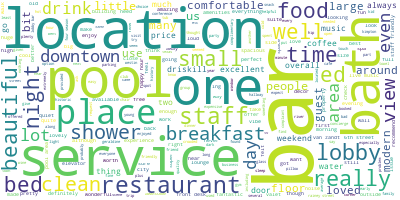

In [0]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
remove('stay',df_pos_entertainment['review'])
remove('room',df_pos_entertainment['review'])
long_string = ','.join(list(df_pos_entertainment['review']))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

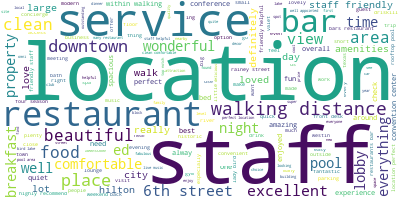

In [0]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
remove('stay',df_pos_location['review'])
remove('room',df_pos_location['review'])
long_string = ','.join(list(df_pos_location['review']))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

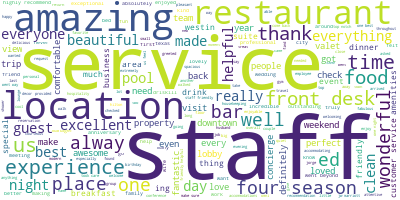

In [0]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
remove('stay',df_pos_staff_service['review'])
remove('room',df_pos_staff_service['review'])
long_string = ','.join(list(df_pos_staff_service['review']))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

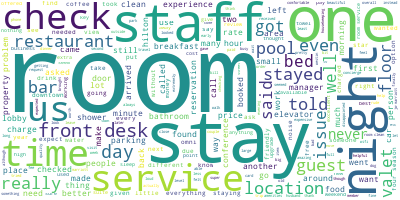

In [0]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df_room['review']))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='red')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [0]:
df_pos_entertainment['neg'] = df_pos_entertainment['review'].apply(lambda x:sia.polarity_scores(x)['neg'])
df_pos_entertainment['neu'] = df_pos_entertainment['review'].apply(lambda x:sia.polarity_scores(x)['neu'])
df_pos_entertainment['pos'] = df_pos_entertainment['review'].apply(lambda x:sia.polarity_scores(x)['pos'])
df_pos_entertainment['compound'] = df_pos_entertainment['review'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [0]:
len(df_pos_entertainment[df_pos_entertainment['compound'] < 0]) / len(df_pos_entertainment)

0.07692307692307693

In [0]:
len(df_pos_entertainment[df_pos_entertainment['compound'] == 0]) / len(df_pos_entertainment)

0.004592422502870264

In [0]:
len(df_pos_entertainment[df_pos_entertainment['compound'] > 0]) / len(df_pos_entertainment)

0.9184845005740528

In [0]:
df_pos_location['neg'] = df_pos_location['review'].apply(lambda x:sia.polarity_scores(x)['neg'])
df_pos_location['neu'] = df_pos_location['review'].apply(lambda x:sia.polarity_scores(x)['neu'])
df_pos_location['pos'] = df_pos_location['review'].apply(lambda x:sia.polarity_scores(x)['pos'])
df_pos_location['compound'] = df_pos_location['review'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [0]:
len(df_pos_location[df_pos_location['compound'] < 0]) / len(df_pos_location)

0.016982364467668192

In [0]:
len(df_pos_location[df_pos_location['compound'] == 0]) / len(df_pos_location)

0.007184846505551927

In [0]:
len(df_pos_location[df_pos_location['compound'] > 0]) / len(df_pos_location)

0.9758327890267798

In [0]:
df_pos_staff_service['neg'] = df_pos_staff_service['review'].apply(lambda x:sia.polarity_scores(x)['neg'])
df_pos_staff_service['neu'] = df_pos_staff_service['review'].apply(lambda x:sia.polarity_scores(x)['neu'])
df_pos_staff_service['pos'] = df_pos_staff_service['review'].apply(lambda x:sia.polarity_scores(x)['pos'])
df_pos_staff_service['compound'] = df_pos_staff_service['review'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [0]:
len(df_pos_staff_service[df_pos_staff_service['compound'] < 0]) / len(df_pos_staff_service)

0.01485148514851485

In [0]:
len(df_pos_staff_service[df_pos_staff_service['compound'] == 0]) / len(df_pos_staff_service)

0.007425742574257425

In [0]:
len(df_pos_staff_service[df_pos_staff_service['compound'] > 0]) / len(df_pos_staff_service)

0.9777227722772277

In [0]:
df_room['neg'] = df_room['review'].apply(lambda x:sia.polarity_scores(x)['neg'])
df_room['neu'] = df_room['review'].apply(lambda x:sia.polarity_scores(x)['neu'])
df_room['pos'] = df_room['review'].apply(lambda x:sia.polarity_scores(x)['pos'])
df_room['compound'] = df_room['review'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [0]:
len(df_room[df_room['compound'] < 0]) / len(df_room)

0.24972253052164262

In [0]:
len(df_room[df_room['compound'] == 0]) / len(df_room)

0.01553829078801332

In [0]:
len(df_room[df_room['compound'] > 0]) / len(df_room)

0.7347391786903441

In [0]:
df_room[df_room['compound'] < 0]

,review,entertainment,room,staff and service,location,labels,neg,neu,pos,compound
2,1 room balcony bad 1 online check save time...,0.165105,0.820843,0.001171,0.012881,room,0.148,0.761,0.091,-0.4830
3,40 valet cost extreme valet boys beg tips pe...,0.004673,0.612150,0.378505,0.004673,room,0.070,0.930,0.000,-0.1280
5,big busy somewhat impersonal overall lots di...,0.067881,0.514901,0.067881,0.349338,room,0.082,0.839,0.079,-0.0534
12,family event family stayed westin street omn...,0.004098,0.495902,0.127049,0.372951,room,0.137,0.778,0.085,-0.3400
18,location surroundings pleasant staff stay q...,0.117512,0.693548,0.002304,0.186636,room,0.251,0.665,0.084,-0.8313
...,...,...,...,...,...,...,...,...,...,...
892,worth money pay room stay somewhere cheaper u...,0.003937,0.988189,0.003937,0.003937,room,0.333,0.475,0.192,-0.6184
894,would expect horrible experience like driskil...,0.092932,0.603403,0.302356,0.001309,room,0.158,0.692,0.150,-0.1725
896,would rate high sound isolation would adequat...,0.458333,0.534091,0.003788,0.003788,room,0.179,0.679,0.142,-0.2960
898,would stay room next 6th street sound music 9...,0.132479,0.816239,0.004274,0.047009,room,0.094,0.815,0.090,-0.0258
